In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
pd.options.display.max_rows = 1000

In [3]:
df = pd.read_csv('D:\cap\capstone2\data\interim\pre_mod.csv', low_memory=False, index_col=None)

In [4]:
df

,Unnamed: 0,event_cause,far_part,crew_category,crew_age,crew_sex,med_certf,med_crtf_vldty,light_cond,wx_cond_basic,type_fly,pilot_privileges,CERT_FORN,CERT_MIL,AP_MEL,AP_MES,AP_SEL,AP_SES,AP_NONE,INSTRUCT_AME,INSTRUCT_ASE,INSTRUCT_GLI,INSTRUCT_IAIR,INSTRUCT_SPRT,INSTRUCT_NONE,INSTRUM_APLN,INSTRUM_NONE,ACTU-INST,ACTU-IRCV,ACTU-L24H,ACTU-L30D,ACTU-L90D,ACTU-PIC,ACTU-TOTL,ALL-INSTRUM,ALL-IRCV,ALL-L24H,ALL-L30D,ALL-L90D,ALL-PIC,ALL-TOTL,MAKE-INSTRUCT,MAKE-IRCV,MAKE-L24H,MAKE-L30D,MAKE-L90D,MAKE-PIC,MAKE-TOTL,MENG-INSTRUCT,MENG-IRCV,MENG-L24H,MENG-L30D,MENG-L90D,MENG-PIC,MENG-TOTL,NGHT-INSTRUCT,NGHT-IRCV,NGHT-L24H,NGHT-L30D,NGHT-L90D,NGHT-PIC,NGHT-TOTL,SENG-INSTRUCT,SENG-IRCV,SENG-L24H,SENG-L30D,SENG-L90D,SENG-PIC,SENG-TOTL,SIMU-TOTL
0,0,Personnel-Decision making/judgment,91,PILOT,46,M,CL3,UNK,DAYL,IMC,PERS,PRIVATE,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,15.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0
1,1,Enviro-Ceiling/visibility/precip,91,PILOT,46,M,CL3,UNK,DAYL,IMC,PERS,PRIVATE,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,15.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0
2,2,Enviro-Ceiling/visibility/precip,91,PILOT,46,M,CL3,UNK,DAYL,IMC,PERS,PRIVATE,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,15.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0
3,3,Aircraft oper/perf/capability-Altitude-Not att...,91,PILOT,46,M,CL3,UNK,DAYL,IMC,PERS,PRIVATE,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,15.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0
4,4,Aircraft oper/perf/capability-(general)-Not at...,91,PILOT,46,M,CL3,UNK,DAYL,IMC,PERS,PRIVATE,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,15.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30769,34895,Aircraft oper/perf/capability-Descent/approach...,91,PILOT,57,F,CL2,VALID,DAYL,VMC,PERS,ATP,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0.0,0.0,0.0,0.0,0.0,125.0,325.0,75.0,0.0,0.0,0.0,5.0,1304.0,3575.0,0.0,0.0,1.0,24.0,30.0,8.0,24.0,0.0,0.0,0.0,0.0,0.0,1100.0,3200.0,0.0,0.0,0.0,0.0,0.0,200.0,340.0,0.0,0.0,1.0,24.0,35.0,195.0,220.0,75.0
30770,34896,Personnel-Aircraft control,91,PILOT,57,F,CL2,VALID,DAYL,VMC,PERS,ATP,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0.0,0.0,0.0,0.0,0.0,125.0,325.0,75.0,0.0,0.0,0.0,5.0,1304.0,3575.0,0.0,0.0,1.0,24.0,30.0,8.0,24.0,0.0,0.0,0.0,0.0,0.0,1100.0,3200.0,0.0,0.0,0.0,0.0,0.0,200.0,340.0,0.0,0.0,1.0,24.0,35.0,195.0,220.0,75.0
30771,34897,Personnel-Aircraft control,91,PILOT,54,M,CL2,VALID,DAYL,VMC,BANNTOW,COMMERCIAL,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,10.0,0.0,5.4,5.4,39.6,1032.0,1151.1,0.0,0.0,5.4,5.4,5.4,81.9,81.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0,39.6,0.0,0.0,5.4,5.4,39.6,1032.0,1151.1,42.6
30772,34898,Aircraft oper/perf/capability-Directional cont...,91,PILOT,54,M,CL2,VALID,DAYL,VMC,BANNTOW,COMMERCIAL,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,10.0,0.0,5.4,5.4,39.6,1032.0,1151.1,0.0,0.0,5.4,5.4,5.4,81.9,81.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0,39.6,0.0,0.0,5.4,5.4,39.6,1032.0,1151.1,42.6


In [5]:
top5 = ['Personnel-Aircraft control', 'Enviro-Object/animal/substance', 'Enviro-Wind', 
        'Aircraft oper/perf/capability-Directional control-Not attained/maintained', 'Personnel-Incorrect Action' ]

In [6]:
X = df[df['event_cause'].isin(top5)]


In [7]:
col_X = X.columns
col_X

Index(['Unnamed: 0', 'event_cause', 'far_part', 'crew_category', 'crew_age',
       'crew_sex', 'med_certf', 'med_crtf_vldty', 'light_cond',
       'wx_cond_basic', 'type_fly', 'pilot_privileges', 'CERT_FORN',
       'CERT_MIL', 'AP_MEL', 'AP_MES', 'AP_SEL', 'AP_SES', 'AP_NONE',
       'INSTRUCT_AME', 'INSTRUCT_ASE', 'INSTRUCT_GLI', 'INSTRUCT_IAIR',
       'INSTRUCT_SPRT', 'INSTRUCT_NONE', 'INSTRUM_APLN', 'INSTRUM_NONE',
       'ACTU-INST', 'ACTU-IRCV', 'ACTU-L24H', 'ACTU-L30D', 'ACTU-L90D',
       'ACTU-PIC', 'ACTU-TOTL', 'ALL-INSTRUM', 'ALL-IRCV', 'ALL-L24H',
       'ALL-L30D', 'ALL-L90D', 'ALL-PIC', 'ALL-TOTL', 'MAKE-INSTRUCT',
       'MAKE-IRCV', 'MAKE-L24H', 'MAKE-L30D', 'MAKE-L90D', 'MAKE-PIC',
       'MAKE-TOTL', 'MENG-INSTRUCT', 'MENG-IRCV', 'MENG-L24H', 'MENG-L30D',
       'MENG-L90D', 'MENG-PIC', 'MENG-TOTL', 'NGHT-INSTRUCT', 'NGHT-IRCV',
       'NGHT-L24H', 'NGHT-L30D', 'NGHT-L90D', 'NGHT-PIC', 'NGHT-TOTL',
       'SENG-INSTRUCT', 'SENG-IRCV', 'SENG-L24H', 'SENG-L30D', 'SENG

In [8]:
X = X.iloc[:,34:48]

In [9]:
col_X = X.columns
col_X

Index(['ALL-INSTRUM', 'ALL-IRCV', 'ALL-L24H', 'ALL-L30D', 'ALL-L90D',
       'ALL-PIC', 'ALL-TOTL', 'MAKE-INSTRUCT', 'MAKE-IRCV', 'MAKE-L24H',
       'MAKE-L30D', 'MAKE-L90D', 'MAKE-PIC', 'MAKE-TOTL'],
      dtype='object')

In [10]:
X.shape

(11574, 14)

In [11]:
y = df[df['event_cause'].isin(top5)]['event_cause']
y.fillna(0, inplace=True)

D:\Anaconda\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [12]:
y.shape

(11574,)

In [13]:
y.describe()

count                          11574
unique                             5
top       Personnel-Aircraft control
freq                            4390
Name: event_cause, dtype: object

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42, stratify=y)


In [15]:
knn = KNeighborsClassifier(n_neighbors=95)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(y_pred)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



['Personnel-Aircraft control' 'Personnel-Aircraft control'
 'Enviro-Object/animal/substance' ... 'Personnel-Aircraft control'
 'Personnel-Aircraft control' 'Personnel-Aircraft control']
[[   0    2    0  440    0]
 [   0    6    0  454    0]
 [   0    3    2  456    0]
 [   0    3    3 1092    0]
 [   0    4    0  429    0]]
                                                                           precision    recall  f1-score   support

Aircraft oper/perf/capability-Directional control-Not attained/maintained       0.00      0.00      0.00       442
                                           Enviro-Object/animal/substance       0.33      0.01      0.03       460
                                                              Enviro-Wind       0.40      0.00      0.01       461
                                               Personnel-Aircraft control       0.38      0.99      0.55      1098
                                               Personnel-Incorrect Action       0.00      0.00   

D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
knn.score(X_test, y_test)

0.38009675190048375

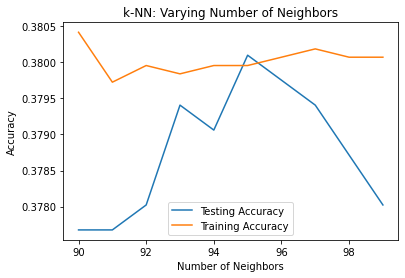

In [17]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(90, 100)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


